In [8]:
import pandas as pd

# Membaca data dari file Excel
df = pd.read_csv('/content/barisanbantenmaju semua.csv')


In [1]:
import pandas as pd

# Membaca data dari file Excel
df = pd.read_excel('/content/dewa19.xlsx')


In [9]:
# Mengganti nama kolom 'Comment' menjadi 'text' terlebih dahulu jika belum dilakukan
df = df.rename(columns={'Comment': 'text'})

# Mengambil hanya kolom 'text' dan menghapus kolom lainnya
df = df[['text']]

# Menampilkan DataFrame untuk memastikan hanya kolom 'text' yang tersisa
df.head()


,text
0,DUUAAAAAAAA ✌️🔥🔥
1,andra soni dan dimyati 02 nomor dua banten men...
2,nomor dua di banten sekolah gratis anak-anak d...
3,no one gonna left behind bersama andra soni di...
4,"kalau kita punya baju simpan diatas lomari, ka..."


In [10]:
df.to_excel('output.xlsx', index=False)

In [4]:
pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 7.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import string

import nltk
nltk.download('punkt_tab')

# Membaca data dari file Excel
df = pd.read_excel('/content/output.xlsx')

# Membuat kolom 'lower' dari kolom 'text' dan mengubahnya menjadi lowercase
df['lower'] = df['text'].str.lower()

# Fungsi untuk membersihkan teks
def cleaning(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # menghapus mention (@...)
    text = re.sub(r'#', '', text)  # menghapus hashtag
    text = re.sub(r'https?:\/\/\S+', '', text)  # menghapus URL
    text = re.sub(r':\)', '', text)  # menghapus emoticon :)
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)  # menghapus karakter tunggal
    text = re.sub(r'\s+', ' ', text)  # menghapus spasi ganda
    text = re.sub(r'[^\w\s]', '', text)  # menghapus tanda baca
    text = re.sub(r'(.)\1+', r'\1\1', text) # menghapus pengulangan huruf berlebih (ooo menjadi oo)
    text = re.sub(r'\.+', '', text)  # menghilangkan akhiran titik ganda
    text = re.sub(r'\d+', '', text)  # menghilangkan angka
    text = re.sub(r'\b\w{1,2}\b', '', text)  # menghilangkan kata dengan panjang 1-2 huruf
    text = text.encode('ascii', 'ignore').decode('ascii')  # menghapus karakter non-ASCII
    return text

# Terapkan fungsi cleaning ke kolom 'lower'
df['cleaning'] = df['lower'].apply(cleaning)

# Buang baris kosong dan duplikat
df = df.dropna()
df = df[df['cleaning'] != '']
df.drop_duplicates(subset=['cleaning'], inplace=True)
df.reset_index(drop=True, inplace=True)

# Tokenisasi
import nltk
nltk.download('punkt')
df['token'] = df['cleaning'].apply(nltk.word_tokenize)

# Menghapus Stopword
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('indonesian'))
additional_stopwords = {"mah", "aja", "nya", "udah", "pake", "pas", "sih", "tau",
                        "bae", "udh", "kalo", "ges", "klo", "biar", "doang", "ngomong", "ngomongin", "gak"}
stop_words.update(additional_stopwords)

df['stopword'] = df['token'].apply(lambda x: [item for item in x if item not in stop_words])


# Stemming menggunakan Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

df['stemming'] = df['stopword'].apply(lambda x: [stemmer.stem(y) for y in x])

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


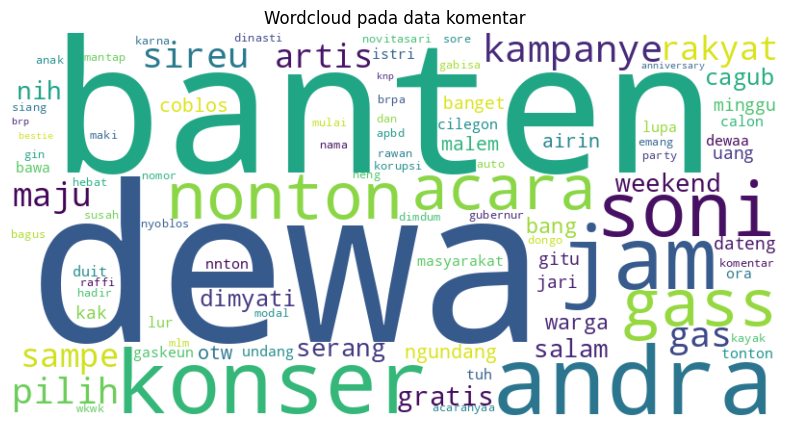

Kata: dewa, Jumlah: 19
Kata: banten, Jumlah: 18
Kata: andra, Jumlah: 15
Kata: konser, Jumlah: 13
Kata: jam, Jumlah: 13
Kata: soni, Jumlah: 11
Kata: gass, Jumlah: 9
Kata: nonton, Jumlah: 9
Kata: acara, Jumlah: 8
Kata: kampanye, Jumlah: 8


In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Menggabungkan semua kata dari kolom 'stemming' untuk menghitung frekuensi kata
all_words = [word for tokens in df['stemming'] for word in tokens]
word_counts = Counter(all_words)  # Menghitung frekuensi kata

# Buat WordCloud menggunakan data frekuensi kata
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    relative_scaling=0.5,
    min_font_size=10,
    max_words=200,
    prefer_horizontal=1  # Opsional: atur lebih banyak kata horizontal
).generate_from_frequencies(word_counts)  # Menggunakan frekuensi kata untuk ukuran kata

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud pada data komentar')
plt.show()

# Tampilkan 10 kata paling sering muncul
most_common_words = word_counts.most_common(10)

for word, count in most_common_words:
    print(f'Kata: {word}, Jumlah: {count}')


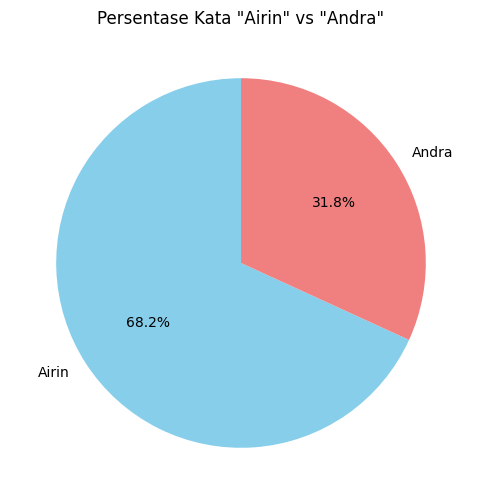

Persentase 'Airin': 68.17%
Persentase 'Andra': 31.83%


In [ ]:
# Menghitung jumlah kata "airin" dan "andra" dari word_counts
airin_count = word_counts.get('airin', 0)  # Jika tidak ditemukan, default 0
andra_count = word_counts.get('andra', 0)  # Jika tidak ditemukan, default 0

# Total kata "airin" dan "andra"
total_count = airin_count + andra_count

# Menghitung persentase masing-masing kata
if total_count > 0:
    airin_percentage = (airin_count / total_count) * 100
    andra_percentage = (andra_count / total_count) * 100
else:
    airin_percentage = andra_percentage = 0

# Menyiapkan data untuk diagram
labels = ['Airin', 'Andra']
percentages = [airin_percentage, andra_percentage]

# Membuat diagram pie
plt.figure(figsize=(6, 6))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Persentase Kata "Airin" vs "Andra"')
plt.show()

# Menampilkan hasil persentase
print(f"Persentase 'Airin': {airin_percentage:.2f}%")
print(f"Persentase 'Andra': {andra_percentage:.2f}%")


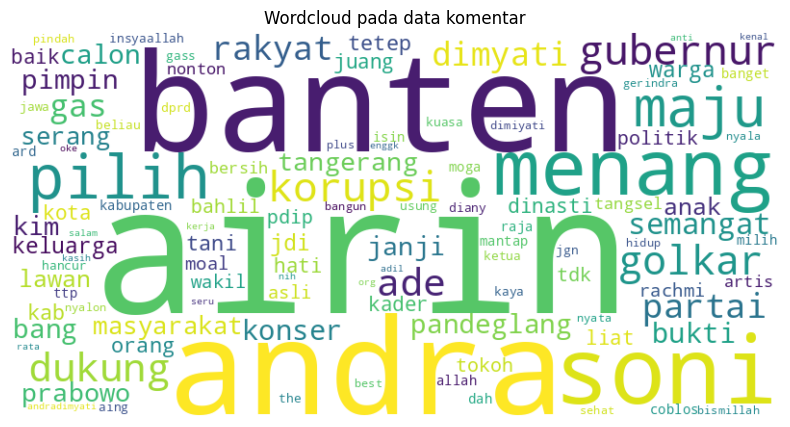

Kata: airin, Jumlah: 220
Kata: banten, Jumlah: 115
Kata: andra, Jumlah: 108
Kata: soni, Jumlah: 82
Kata: menang, Jumlah: 67
Kata: pilih, Jumlah: 44
Kata: maju, Jumlah: 35
Kata: gubernur, Jumlah: 33
Kata: korupsi, Jumlah: 33
Kata: golkar, Jumlah: 31


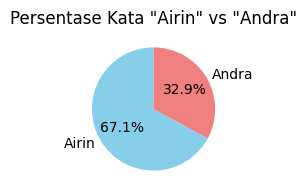

Persentase 'Airin': 67.07%
Persentase 'Andra': 32.93%


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Menggabungkan semua kata dari kolom 'stemming' untuk menghitung frekuensi kata
all_words = [word for tokens in df['stemming'] for word in tokens]
word_counts = Counter(all_words)  # Menghitung frekuensi kata

# Buat WordCloud menggunakan data frekuensi kata
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    relative_scaling=0.5,
    min_font_size=10,
    max_words=200,
    prefer_horizontal=1  # Opsional: atur lebih banyak kata horizontal
).generate_from_frequencies(word_counts)  # Menggunakan frekuensi kata untuk ukuran kata

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud pada data komentar')
plt.show()

# Tampilkan 10 kata paling sering muncul
most_common_words = word_counts.most_common(10)

for word, count in most_common_words:
    print(f'Kata: {word}, Jumlah: {count}')

    # Menghitung jumlah kata "airin" dan "andra" dari word_counts
airin_count = word_counts.get('airin', 0)  # Jika tidak ditemukan, default 0
andra_count = word_counts.get('andra', 0)  # Jika tidak ditemukan, default 0

# Total kata "airin" dan "andra"
total_count = airin_count + andra_count

# Menghitung persentase masing-masing kata
if total_count > 0:
    airin_percentage = (airin_count / total_count) * 100
    andra_percentage = (andra_count / total_count) * 100
else:
    airin_percentage = andra_percentage = 0

# Menyiapkan data untuk diagram
labels = ['Airin', 'Andra']
percentages = [airin_percentage, andra_percentage]

# Membuat diagram pie
plt.figure(figsize=(2, 2))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Persentase Kata "Airin" vs "Andra"')
plt.show()

# Menampilkan hasil persentase
print(f"Persentase 'Airin': {airin_percentage:.2f}%")
print(f"Persentase 'Andra': {andra_percentage:.2f}%")

